# Music Recommendation
## LetsGrowMore Intership
#### Merin George


In [2]:
# Load Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [5]:
pip install pyunpack


In [6]:
pip install patool

     |████████████████████████████████| 77 kB 2.5 MB/s 


In [7]:
from pyunpack.cli import Archive

directory = "/content/drive/MyDrive/data's sem 3"
Archive("/content/drive/MyDrive/data's sem 3/kkbox-music-recommendation-challenge/train.csv.7z").extractall(directory)
Archive("/content/drive/MyDrive/data's sem 3/kkbox-music-recommendation-challenge/test.csv.7z").extractall(directory)

In [8]:
Archive("/content/drive/MyDrive/data's sem 3/kkbox-music-recommendation-challenge/members.csv.7z").extractall(directory)
Archive("/content/drive/MyDrive/data's sem 3/kkbox-music-recommendation-challenge/songs.csv.7z").extractall(directory)
Archive("/content/drive/MyDrive/data's sem 3/kkbox-music-recommendation-challenge/song_extra_info.csv.7z").extractall(directory)

In [9]:
#Read the data
music_df = pd.read_csv("/content/drive/MyDrive/data's sem 3/train.csv")
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


### EDA

In [10]:
music_df.shape

(7377418, 6)

In [11]:
#sampling the data to return a random sample of items from an axis of object.
music_df = music_df.sample(frac=0.1)

In [12]:
music_df.describe()

,target
count,737742.000000
mean,0.503263
std,0.499990
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 5087404 to 5660885
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                737742 non-null  object
 1   song_id             737742 non-null  object
 2   source_system_tab   735275 non-null  object
 3   source_screen_name  696270 non-null  object
 4   source_type         735592 non-null  object
 5   target              737742 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


#### Countplot on source_type

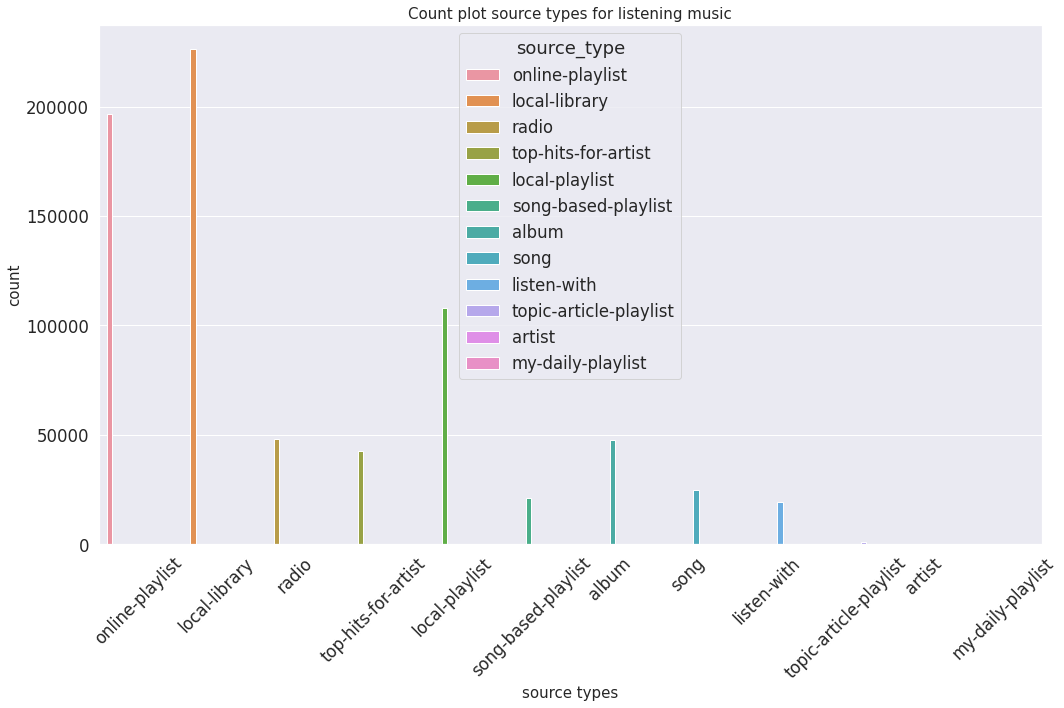

In [14]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.countplot(x='source_type',hue='source_type',data=music_df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=15)
plt.tight_layout()

we can see that local library are more perffered than any other source types as well after that online playlist

#### Countplt on source_screen_name


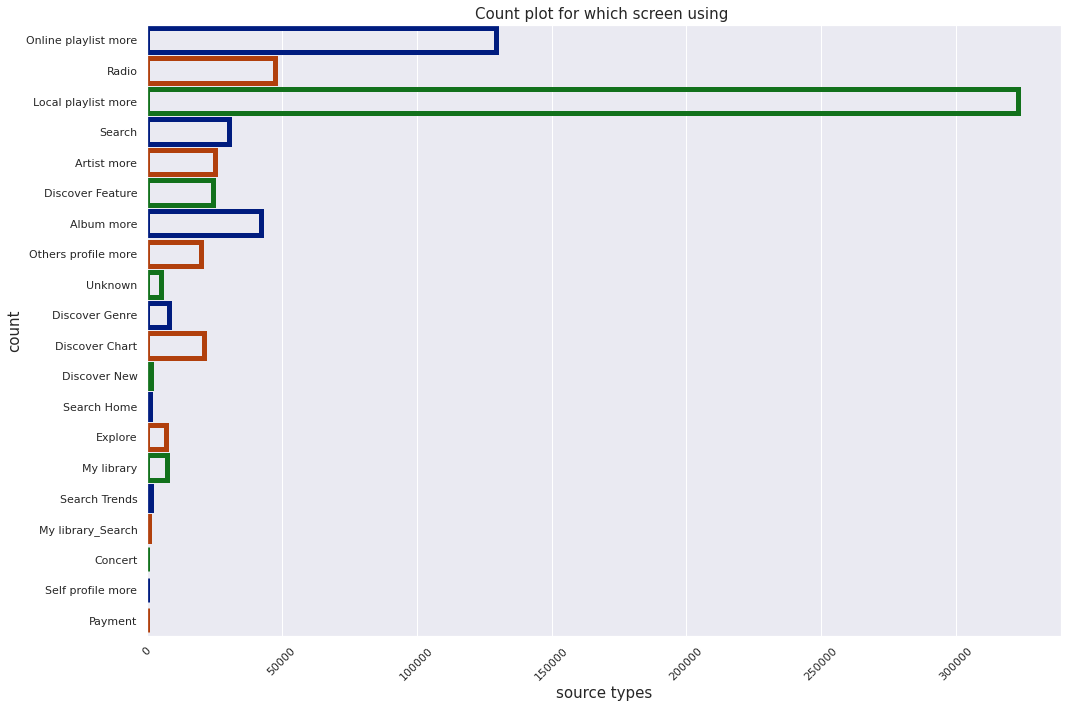

In [15]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.countplot(y='source_screen_name',data=music_df,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot for which screen using ',fontsize=15)
plt.tight_layout()

we can see that local play list has the highest preference



#### countplot on source_system_tab


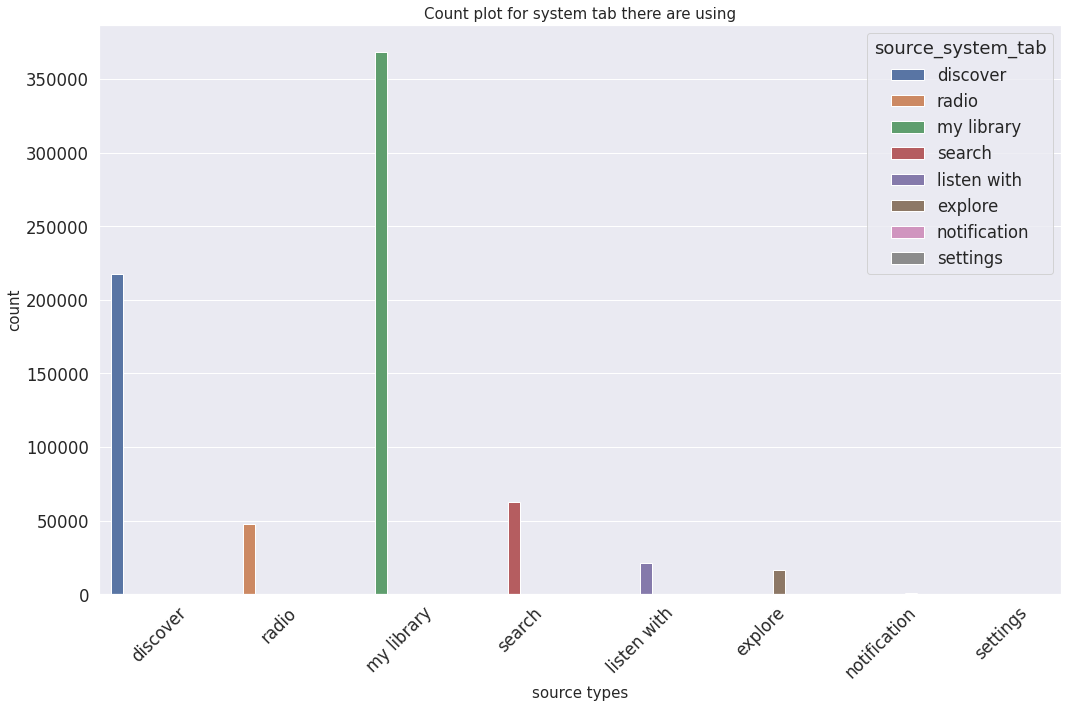

In [16]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=music_df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=15)
plt.tight_layout()

In [17]:
#Read the music_df file
music_df = music_df.sample(frac=0.1)

In [19]:
songs_df = pd.read_csv("/content/drive/MyDrive/data's sem 3/songs.csv")
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [20]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [21]:
#Merge that file into existing dataframe
music_df = pd.merge(music_df, songs_df,on="song_id", how="left")
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,Cd5jCGcI/dwq5L1i58DZKqRuOLc2LvvsJfWRYMRfZrY=,H0pfaBjENAn1eYhCA5+rurd8AnnJF17J512SKZBfvfU=,my library,Local playlist more,local-playlist,0,247911.0,465,莫文蔚 (Karen Mok),Skot Suyama,李焯雄,3.0
1,gaMVNUs2JwRHyklRKQhklPvIs7u5uOqmuQ/n3MiQaeE=,+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=,discover,Online playlist more,online-playlist,1,283846.0,465,陳勢安 (Andrew Tan),覃嘉健,馬嵩惟,3.0
2,SyjIF0jiR6LetsEF7CEx48L/Prf6wRkugjYy6v02Stg=,AHx/QHvJzdwpro1+Cbp+LjMqARfiBeQ3C68LWQwfU2E=,radio,Radio,radio,0,339150.0,786,V.K,NaN,NaN,-1.0
3,4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=,fJVAbDTwVns4pPmdQxlPjxNHMPmz5ioM6bswGA5lOsA=,my library,Local playlist more,local-playlist,1,205453.0,359,Green Day,Green Day,Billie Joe Armstrong,52.0
4,UfneAP0cJfVVl3K0rNcF+7+O3iGX/X7rGXyvklQ4RLs=,Qy+gXpJ+XViWd3/wBKB6NMQJgiyfC2Db3eGBeo8Bq5s=,my library,Local playlist more,local-library,1,228101.0,465,aMEI (張惠妹),梁思樺,易家揚,3.0


In [22]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                73774 non-null  object 
 1   song_id             73774 non-null  object 
 2   source_system_tab   73526 non-null  object 
 3   source_screen_name  69641 non-null  object 
 4   source_type         73549 non-null  object 
 5   target              73774 non-null  int64  
 6   song_length         73773 non-null  float64
 7   genre_ids           72571 non-null  object 
 8   artist_name         73773 non-null  object 
 9   composer            57164 non-null  object 
 10  lyricist            42017 non-null  object 
 11  language            73773 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 7.3+ MB


In [23]:
#reading the members file
members_df = pd.read_csv("/content/drive/MyDrive/data's sem 3/members.csv")
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [24]:
#merging it into original dataframe
music_df = pd.merge(music_df, members_df, on="msno", how="left")
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73526 non-null  object 
 3   source_screen_name      69641 non-null  object 
 4   source_type             73549 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73773 non-null  float64
 7   genre_ids               72571 non-null  object 
 8   artist_name             73773 non-null  object 
 9   composer                57164 non-null  object 
 10  lyricist                42017 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44089 non-null

In [25]:
#check for null values now
music_df.isnull().any()

msno                      False
song_id                   False
source_system_tab          True
source_screen_name         True
source_type                True
target                    False
song_length                True
genre_ids                  True
artist_name                True
composer                   True
lyricist                   True
language                   True
city                      False
bd                        False
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [26]:
# since we have null values, we replace null values

for item in music_df.select_dtypes(include=['object']).columns:
    music_df[item][music_df[item].isnull()]='unknown'
music_df = music_df.fillna(value=0)


In [27]:
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,Cd5jCGcI/dwq5L1i58DZKqRuOLc2LvvsJfWRYMRfZrY=,H0pfaBjENAn1eYhCA5+rurd8AnnJF17J512SKZBfvfU=,my library,Local playlist more,local-playlist,0,247911.0,465,莫文蔚 (Karen Mok),Skot Suyama,李焯雄,3.0,13,31,male,3,20130427,20171012
1,gaMVNUs2JwRHyklRKQhklPvIs7u5uOqmuQ/n3MiQaeE=,+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=,discover,Online playlist more,online-playlist,1,283846.0,465,陳勢安 (Andrew Tan),覃嘉健,馬嵩惟,3.0,14,28,male,9,20070101,20170930
2,SyjIF0jiR6LetsEF7CEx48L/Prf6wRkugjYy6v02Stg=,AHx/QHvJzdwpro1+Cbp+LjMqARfiBeQ3C68LWQwfU2E=,radio,Radio,radio,0,339150.0,786,V.K,unknown,unknown,-1.0,1,0,unknown,7,20150527,20170930
3,4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=,fJVAbDTwVns4pPmdQxlPjxNHMPmz5ioM6bswGA5lOsA=,my library,Local playlist more,local-playlist,1,205453.0,359,Green Day,Green Day,Billie Joe Armstrong,52.0,4,35,male,3,20150805,20170920
4,UfneAP0cJfVVl3K0rNcF+7+O3iGX/X7rGXyvklQ4RLs=,Qy+gXpJ+XViWd3/wBKB6NMQJgiyfC2Db3eGBeo8Bq5s=,my library,Local playlist more,local-library,1,228101.0,465,aMEI (張惠妹),梁思樺,易家揚,3.0,9,19,female,3,20130223,20170923


In [28]:
music_df.isnull().any()

msno                      False
song_id                   False
source_system_tab         False
source_screen_name        False
source_type               False
target                    False
song_length               False
genre_ids                 False
artist_name               False
composer                  False
lyricist                  False
language                  False
city                      False
bd                        False
gender                    False
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [29]:
#Seperate Dates

music_df.registration_init_time = pd.to_datetime(music_df.registration_init_time, format="%Y%m%d",errors='ignore')
music_df["registration_init_time_year"]  = music_df.registration_init_time.dt.year
music_df["registration_init_time_month"] = music_df.registration_init_time.dt.month
music_df["registration_init_time_day"]   = music_df.registration_init_time.dt.day


#expiration date
music_df.expiration_date = pd.to_datetime(music_df.expiration_date,  format='%Y%m%d', errors='ignore')
music_df['expiration_date_year'] = music_df['expiration_date'].dt.year
music_df['expiration_date_month'] = music_df['expiration_date'].dt.month
music_df['expiration_date_day'] = music_df['expiration_date'].dt.day


In [30]:
#Dates to categoty
music_df['registration_init_time'] = music_df['registration_init_time'].astype('category')
music_df['expiration_date'] = music_df['expiration_date'].astype('category')

In [31]:
music = music_df.copy()


In [32]:
for item in music.columns:
    if music[item].dtype == 'object':
        music[item] = music[item].astype('category')

In [34]:
#convert into encoding after categorical data
for col in music.select_dtypes(include=['category']).columns:
    music[col] = music[col].cat.codes

In [35]:
music.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.001321,0.007785,-0.006363,-0.002754,0.002866,-0.001096,0.008924,0.005740,-0.001853,0.001856,-0.013110,0.009568,-0.001858,-0.003002,0.000915,0.002510,0.016288,0.002006,0.013862,0.007030,0.004078,0.013450,0.002478
song_id,-0.001321,1.000000,-0.007538,0.000900,0.002039,-0.006446,-0.008641,0.006399,-0.015433,-0.038118,-0.032105,0.010382,-0.004700,0.000741,0.000860,0.003385,0.003901,0.002330,0.004316,-0.008321,0.003238,0.000615,-0.000213,0.002462
source_system_tab,0.007785,-0.007538,1.000000,-0.047744,-0.085835,0.032416,0.024965,0.037624,0.039012,0.056944,0.034853,-0.049765,0.021276,0.021529,-0.025621,0.034808,-0.043760,0.054080,-0.039292,-0.011708,0.005076,0.037978,0.010489,0.005461
source_screen_name,-0.006363,0.000900,-0.047744,1.000000,0.415053,-0.059172,0.022718,-0.028812,0.011661,0.024557,0.010486,-0.023501,-0.025175,-0.017411,0.023963,-0.030218,0.043722,-0.035223,0.040891,0.009150,0.002965,-0.022915,-0.007793,0.000443
source_type,-0.002754,0.002039,-0.085835,0.415053,1.000000,-0.124074,0.013197,-0.064176,-0.021970,-0.001180,-0.015175,0.014876,-0.027022,-0.002897,0.025888,-0.020839,0.038030,-0.044743,0.035198,0.009498,0.004657,-0.037229,0.006750,-0.005716
target,0.002866,-0.006446,0.032416,-0.059172,-0.124074,1.000000,0.001481,0.014118,0.011944,-0.004880,0.002837,-0.024733,0.012570,0.002102,-0.015014,0.011207,-0.001328,0.059366,-0.000385,-0.005917,-0.011274,0.042943,0.011619,-0.004185
song_length,-0.001096,-0.008641,0.024965,0.022718,0.013197,0.001481,1.000000,0.031940,0.127019,0.112196,0.094440,-0.226065,-0.001598,0.006334,0.007458,-0.000329,-0.002127,-0.004323,-0.003436,0.006273,0.006232,-0.006071,0.004361,-0.002353
genre_ids,0.008924,0.006399,0.037624,-0.028812,-0.064176,0.014118,0.031940,1.000000,0.199445,0.148021,0.123759,-0.306689,0.003079,0.009242,-0.011933,0.002826,-0.008854,0.004627,-0.009156,0.000472,-0.001352,0.003277,-0.006909,0.000485
artist_name,0.005740,-0.015433,0.039012,0.011661,-0.021970,0.011944,0.127019,0.199445,1.000000,0.354051,0.325488,-0.585464,0.012915,0.004915,-0.001076,-0.000908,-0.006415,0.003270,-0.007337,0.007128,0.004100,0.001894,-0.000498,0.000782
composer,-0.001853,-0.038118,0.056944,0.024557,-0.001180,-0.004880,0.112196,0.148021,0.354051,1.000000,0.641024,-0.392230,0.009193,0.001552,-0.001433,0.002767,-0.001260,0.000522,-0.001976,0.003378,0.002757,-0.000064,0.000598,0.000286


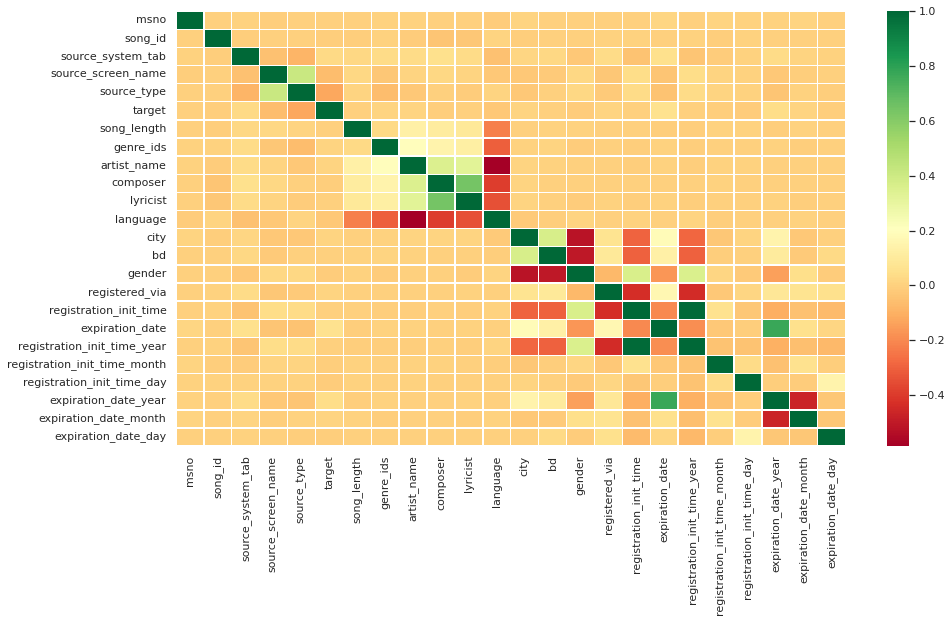

In [36]:
#Generating heatmap for correlation ploy
plt.figure(figsize=[15,8])
sns.heatmap(music.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()


### Modelling and Predicting



#### Model with the best estimator


In [37]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(music[music.columns[music.columns != 'target']], music.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
music_plot = pd.DataFrame({'features': music.columns[music.columns != 'target'],'importances': model.feature_importances_})
music_plot = music_plot.sort_values('importances', ascending=False)

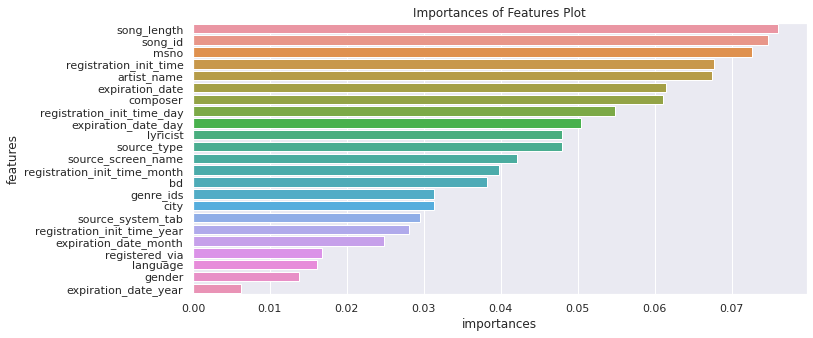

In [39]:
#plotting the importance of features
plt.figure(figsize=[11,5])
sns.barplot(x = music_plot.importances, y = music_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [40]:
model.feature_importances_

array([0.07257528, 0.07468922, 0.02944877, 0.04212507, 0.04795332,
       0.07595606, 0.03131751, 0.0674349 , 0.06110787, 0.04796826,
       0.01614488, 0.03127264, 0.03823101, 0.01374157, 0.01674322,
       0.06767638, 0.06143719, 0.02805641, 0.0398166 , 0.05485534,
       0.00624201, 0.02478194, 0.05042456])

In [41]:
music = music.drop(music_plot.features[music_plot.importances < 0.04].tolist(),1)

In [42]:
music.columns.to_list()

['msno',
 'song_id',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [43]:
target = music.pop('target')

In [44]:
#training and splitting then using xgb boost

X_train, X_test, y_train, y_test = train_test_split(music, target, test_size = 0.25)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
predict_labels = model.predict(X_test)
print(metrics.classification_report(y_test, predict_labels))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61      9061
           1       0.63      0.66      0.64      9383

    accuracy                           0.62     18444
   macro avg       0.62      0.62      0.62     18444
weighted avg       0.62      0.62      0.62     18444



In [46]:
print(metrics.accuracy_score(y_test, predict_labels))

0.6249728909130341
